In [ ]:
import numpy as np
import time
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import warnings
from clusteval import clusteval

warnings.filterwarnings('ignore')

In [ ]:
start_time = time.time()
scaler = StandardScaler()

Data_train = pd.read_csv('AppML_InitialProject_test_clustering.csv')

Data_train = pd.DataFrame(scaler.fit_transform(Data_train), columns=Data_train.columns)

X = Data_train

# Finding the most important features based on the **laplacian score**

In [ ]:
kwargs_W = {"metric": "euclidean", "neighbor_mode": "knn", "weight_mode": "heat_kernel", "k": 5, 't': 1}
W = construct_W.construct_W(X.to_numpy(), **kwargs_W)

laplacian_scores = lap_score.lap_score(X.to_numpy(), W=W)

sorted_indices = np.argsort(laplacian_scores)

top_10_features = Data_train.columns[sorted_indices[:10]].tolist()

print("Top 10 Features based on Laplacian Score:")
print(top_10_features)

X_10 = X[top_10_features]

Top 10 Features based on Laplacian Score:
['pX_E5x7_Lr1', 'pX_ptvarcone40', 'pX_topoetcone20ptCorrection', 'pX_E_Lr2_LowG', 'pX_emins1', 'pX_nCells_Lr1_LowG', 'pX_deltaEta0', 'pX_deltaPhi2', 'pX_etcone30', 'pX_nCells_Lr1_HiG']


# Estimating the number of clusters using the **calinski harabasz score**

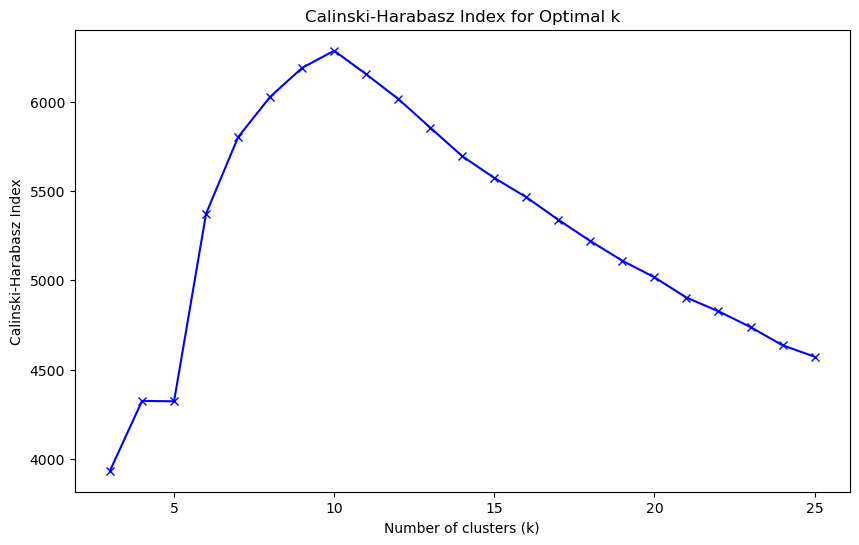

Optimal number of clusters according to the Calinski-Harabasz Index: 10


In [ ]:
def optimal_k_using_ch_index(X_10, max_k, random_state=42):
    ch_scores = []

    for k in range(3, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X_10)
        labels = kmeans.labels_
        ch_score = calinski_harabasz_score(X_10, labels)
        ch_scores.append(ch_score)

    optimal_k = np.argmax(ch_scores) + 3 
    return optimal_k, ch_scores

max_k = 25
optimal_k, ch_scores = optimal_k_using_ch_index(X_10, max_k)

plt.figure(figsize=(10, 6))
plt.plot(range(3, max_k + 1), ch_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Optimal k')
plt.show()
print(f"Optimal number of clusters according to the Calinski-Harabasz Index: {optimal_k}")

# Clustering using **kmeans**

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_10)
labels = kmeans.labels_.astype(float)

print(labels)

[9. 9. 2. ... 5. 9. 9.]


In [20]:
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 66.9501461982727 seconds


# Saving (set to False)

In [ ]:
folder_name = 'solutions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Write = False
if Write:
    variables = top_10_features
    csv_file_path = os.path.join(folder_name, 'Clustering_KMeans_VariableList.csv')
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        for variable in variables:
            writer.writerow([variable])

    data = labels
    csv_file_path = os.path.join(folder_name, 'Clustering_KMeans.csv')

    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        for index, item in enumerate(data, start=0):
            writer.writerow([index, item])